### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [14]:
test_y_df = pd.read_csv('./datasets/titanic_gender.csv', encoding='utf-8')
test_df = pd.read_csv('./datasets/titanic_test.csv', encoding='utf-8')
train_df =pd.read_csv('./datasets/titanic_train.csv', encoding='utf-8')


In [15]:
train = train_df[['Pclass','Sex', 'Age', 'Survived']]
test = test_df[['Pclass','Sex', 'Age']]
test_y = test_y_df['Survived']

In [16]:
train = train.dropna(axis=0)

In [17]:
# Sex Label encoding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex'] = data

In [18]:
# Age Scaling
scaler = MinMaxScaler()
scaler.fit(train[['Age']])
data = scaler.transform(train[['Age']])
train['Age'] = data

In [19]:
X =train.drop('Survived', axis=1)
y =train['Survived']
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [20]:
test = test.fillna(np.mean(test['Age']))
test.isnull().sum()
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex']=data

scaler = MinMaxScaler()
scaler.fit(test[['Age']])
data = scaler.transform(test[['Age']])
test['Age'] = data


In [21]:
pred = lr.predict(test)
pred_proba = lr.predict_proba(test)

In [22]:
import numpy as np
from sklearn.metrics import roc_curve


In [23]:
fpr, tpr,threshosd = roc_curve(test_y, pred_proba[:,1])

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X,y)
dt_pred_proba = dt.predict_proba(test)
dt_fpr, dt_tpr, dt_threshosd = roc_curve(test_y, dt_pred_proba[:,1])

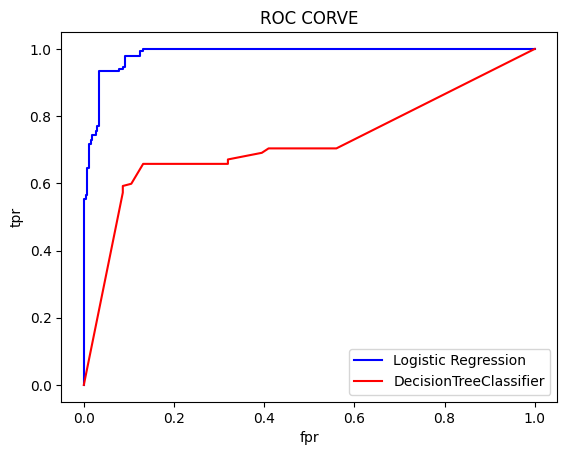

In [28]:
import matplotlib.pyplot as plt

plt.title("ROC CORVE")
plt.xlabel("fpr"   )
plt.ylabel("tpr")
plt.plot(fpr, tpr, "b", label = "Logistic Regression" )
plt.plot(dt_fpr, dt_tpr, "r", label = "DecisionTreeClassifier" )
plt.legend(loc = "lower right")
plt.show()

### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [34]:
from sklearn.metrics import roc_auc_score
dt_auc = roc_auc_score(test_y, dt_pred_proba[:,1])
lr_auc = roc_auc_score(test_y, pred_proba[:,1])

print(f'regression auc : {lr_auc} & decisiontree auc : {dt_auc}')


regression auc : 0.9852344677483182 & decisiontree auc : 0.7184161060546101
